In [83]:
import pandas as pd
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, f1_score, confusion_matrix

In [7]:
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data = old_feature_name_df.groupby('column_name').cumcount(),
                                  columns = ['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(),
                                  feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[
         ['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1])
         if x[1]>0 else x[0] ,  axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

In [8]:
def get_human_dataset( ):
    # 각 데이터 파일들은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당.
    feature_name_df = pd.read_csv('C:/Users/procns/Desktop/인공지능/HAR/UCI-HAR/UCI HAR Dataset/features.txt',sep='\s+',
    header=None,names=['column_index','column_name'])    
    # 중복된 피처명을 수정하는 get_new_feature_name_df()를 이용, 신규 피처명 DataFrame생성. 
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    
    # DataFrame에 피처명을 컬럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()
    
    # 학습 피처 데이터 셋과 테스트 피처 데이터을 DataFrame으로 로딩. 컬럼명은 feature_name 적용
    X_train = pd.read_csv("C:/Users/procns/Desktop/인공지능/HAR/UCI-HAR/UCI HAR Dataset/train/x_train.txt",sep='\s+', names=feature_name )
    X_test = pd.read_csv('C:/Users/procns/Desktop/인공지능/HAR/UCI-HAR/UCI HAR Dataset/test/x_test.txt',sep='\s+', names=feature_name)
    
    # 학습 레이블과 테스트 레이블 데이터을 DataFrame으로 로딩하고 컬럼명은 action으로 부여
    y_train = pd.read_csv('C:/Users/procns/Desktop/인공지능/HAR/UCI-HAR/UCI HAR Dataset/train/y_train.txt',sep='\s+',header=None,names=['action'])
    y_test = pd.read_csv('C:/Users/procns/Desktop/인공지능/HAR/UCI-HAR/UCI HAR Dataset/test/y_test.txt',sep='\s+',header=None,names=['action'])
    
    # 로드된 학습/테스트용 DataFrame을 모두 반환 
    return X_train, X_test, y_train, y_test

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

# 결정 트리에서 사용한 get_human_dataset( )을 이용해 학습/테스트용 DataFrame 반환
X_train, X_test, y_train, y_test = get_human_dataset()

In [10]:
X_train

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.070157,-0.588433,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,0.165259,-0.390738,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,0.195034,0.025145,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,0.013865,0.063907,-0.344314,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339


In [11]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(X_train)
train_scaled = ss.transform(X_train)
test_scaled = ss.transform(X_test)

In [17]:
print ("==================================")
print (" ACCURACY OF OTHER ML CLASSIFIERS" )
print ("==================================")

 ACCURACY OF OTHER ML CLASSIFIERS


In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt 
import warnings
import seaborn as sns

# SVC


--- SVM Classifier ---
0.9521547336274178


<Axes: title={'center': 'SVM Confusion Matrix'}>

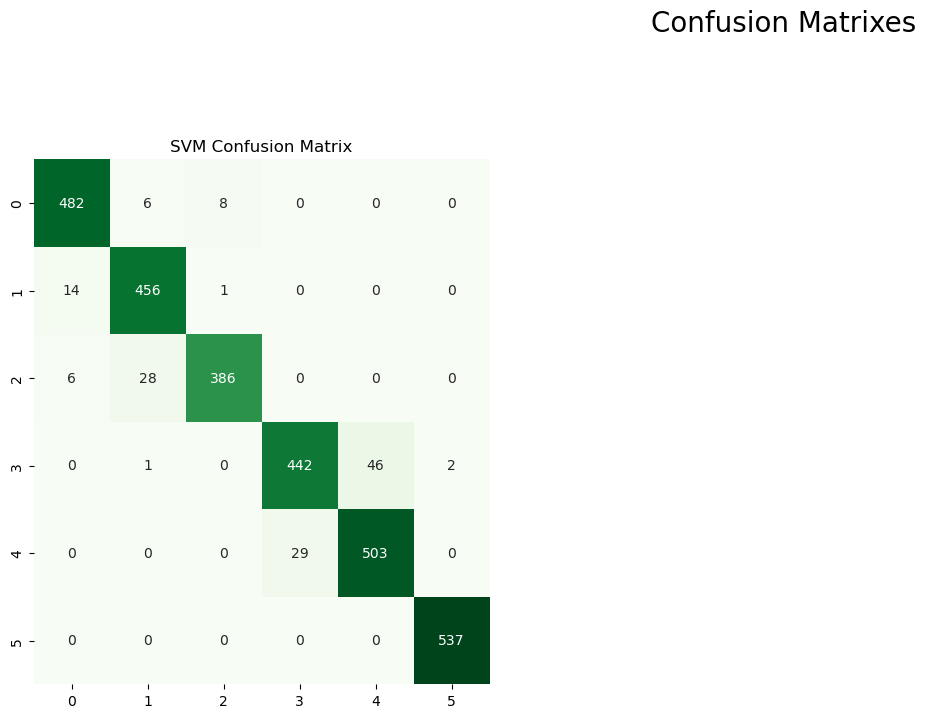

In [23]:

clf_svm = SVC(random_state=0)
clf_svm.fit(train_scaled, y_train)

pred_svm = clf_svm.predict(test_scaled)

print("\n--- SVM Classifier ---")
print(accuracy_score(y_test, pred_svm))
#print(confusion_matrix(y_test, pred_svm))

cm_svm = confusion_matrix(y_test, pred_svm)
plt.figure(figsize=(20,15))
plt.suptitle("Confusion Matrixes",fontsize=20)
plt.subplot(2,3,1)
plt.title("SVM Confusion Matrix")
sns.heatmap(cm_svm,cbar=False,annot=True,cmap="Greens",fmt="d")

# Random Forest


--- Radom Forest ---
0.9233118425517476


<Axes: title={'center': 'Random Forest Confusion Matrix'}>

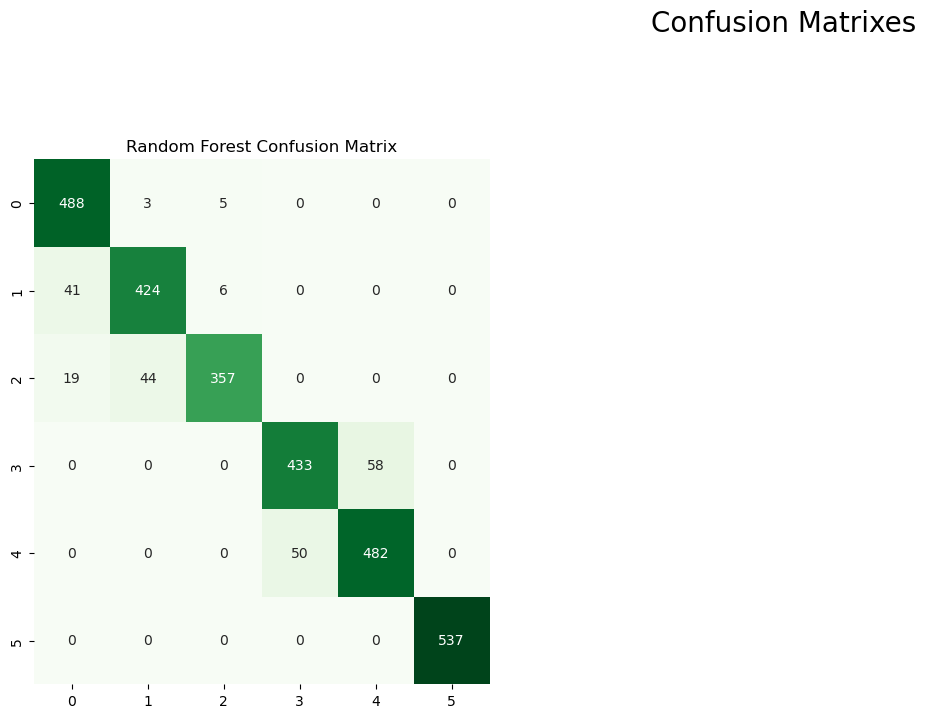

In [24]:

warnings.filterwarnings('ignore')

print ("\n--- Radom Forest ---")
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(train_scaled, y_train)
pred_rf = rf_clf.predict(test_scaled)
print(accuracy_score(y_test,pred_rf))
#print (confusion_matrix(y_test, pred_rf))

cm_rf = confusion_matrix(y_test, pred_rf)
plt.figure(figsize=(20,15))
plt.suptitle("Confusion Matrixes",fontsize=20)
plt.subplot(2,3,1)
plt.title("Random Forest Confusion Matrix")
sns.heatmap(cm_rf,cbar=False,annot=True,cmap="Greens",fmt="d")

# LogisticRegression


--- Logistic Regression Classifier ---
0.9538513742789277


<Axes: title={'center': 'Logistic Regression Confusion Matrix'}>

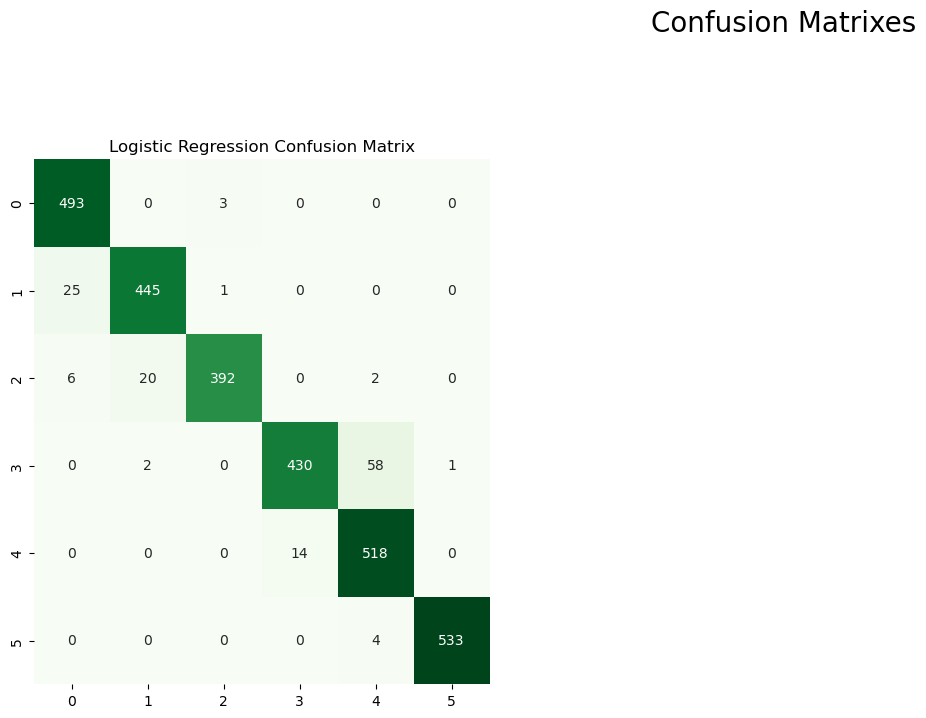

In [28]:
# Build a logistic regression classifier and predict

clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(train_scaled, y_train)

pred_lr = clf_lr.predict(test_scaled)

print ("\n--- Logistic Regression Classifier ---")
print (accuracy_score(y_test, pred_lr))
#print (confusion_matrix(y_test, pred_lr))

cm_lr = confusion_matrix(y_test, pred_lr)
plt.figure(figsize=(20,15))
plt.suptitle("Confusion Matrixes",fontsize=20)
plt.subplot(2,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lr,cbar=False,annot=True,cmap="Greens",fmt="d")

# DecisionTreeClassifier


--- Decision Tree Classifier ---
0.8544282321004412
[[440  36  20   0   0   0]
 [ 63 370  38   0   0   0]
 [ 19  56 345   0   0   0]
 [  0   0   0 370 121   0]
 [  0   0   0  76 456   0]
 [  0   0   0   0   0 537]]


<Axes: title={'center': 'Decision Tree Confusion Matrix'}>

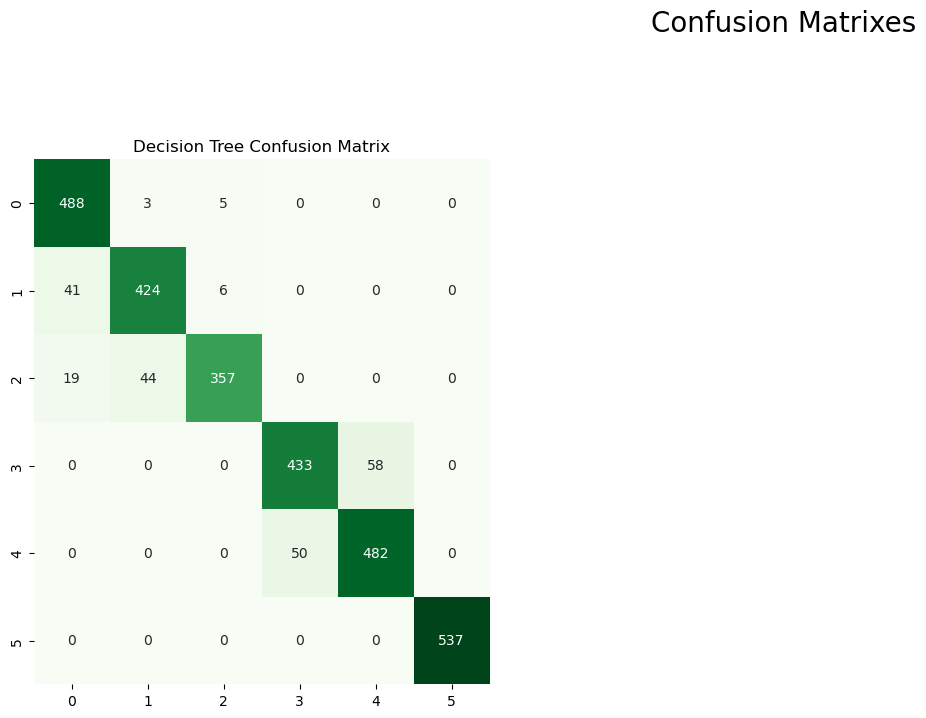

In [29]:


clf_dt = DecisionTreeClassifier()
clf_dt.fit(train_scaled, y_train)

pred_lr = clf_dt.predict(test_scaled)

print ("\n--- Decision Tree Classifier ---")
print (accuracy_score(y_test, pred_lr))
print (confusion_matrix(y_test, pred_lr))

cm_dt = confusion_matrix(y_test, pred_rf)
plt.figure(figsize=(20,15))
plt.suptitle("Confusion Matrixes",fontsize=20)
plt.subplot(2,3,1)
plt.title("Decision Tree Confusion Matrix")
sns.heatmap(cm_dt,cbar=False,annot=True,cmap="Greens",fmt="d")

# CNN

In [62]:
import numpy as np

from keras.utils.vis_utils import plot_model
from keras.models import Sequential
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Input, TimeDistributed
from keras.utils import to_categorical
from keras.layers import concatenate
import seaborn as sns

In [55]:
X_train, X_test, y_train, y_test = get_human_dataset()

In [22]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(7352, 561) (7352, 1) (2947, 561) (2947, 1)


In [56]:
import numpy as np

y_train_array = np.array(y_train)
train_set = np.c_[X_train, y_train_array]

y_test_array = np.array(y_test)
test_set = np.c_[X_test, y_test_array]

#X_train = split_sequence(train_set, 3)
#X_test = split_sequence(test_set, 3)
train_set.shape

(7352, 562)

In [57]:
train_set[3,-1]

5.0

In [58]:
from numpy import array
# split a univariate sequence into samples
def split_sequences(sequence, n_steps):
 X, y = list(), list()
 for i in range(len(sequence)):
 # find the end of this pattern
     end_ix = i + n_steps
 # check if we are beyond the sequence
     if end_ix > len(sequence)-1:
         break
 # gather input and output parts of the pattern
     seq_x, seq_y = sequence[i:end_ix, :-1], sequence[end_ix-1, -1]
     X.append(seq_x)
     y.append(seq_y)
 return array(X), array(y)

In [109]:

X_train, y_train = split_sequences(train_set, 12)
print(X_train.shape, y_train.shape)

X_test, y_test = split_sequences(test_set, 12)
print(X_test.shape, y_test.shape)

(7340, 12, 561) (7340,)
(2935, 12, 561) (2935,)


In [110]:
from keras.utils import to_categorical
from keras.layers import concatenate


y_train = y_train - 1
y_test = y_test - 1

    # one hot encode y
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [111]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(7340, 12, 561) (7340, 6) (2935, 12, 561) (2935, 6)


In [145]:
verbose, epochs, batch_size = 1, 10, 32
n_timesteps, n_features, n_outputs = X_train.shape[1], X_train.shape[2], y_train.shape[1]

model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

 
 # fit network

In [146]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_12 (Conv1D)          (None, 10, 64)            107776    
                                                                 
 conv1d_13 (Conv1D)          (None, 8, 64)             12352     
                                                                 
 dropout_9 (Dropout)         (None, 8, 64)             0         
                                                                 
 max_pooling1d_5 (MaxPooling  (None, 4, 64)            0         
 1D)                                                             
                                                                 
 flatten_5 (Flatten)         (None, 256)               0         
                                                                 
 dense_18 (Dense)            (None, 64)                16448     
                                                     

In [147]:
history = model.fit(X_train, y_train, epochs=10, batch_size=batch_size, verbose=verbose)

Epoch 1/10
230/230 [==============================] - 4s 11ms/step - loss: 0.6952 - accuracy: 0.7157
Epoch 2/10
230/230 [==============================] - 3s 11ms/step - loss: 0.2889 - accuracy: 0.8936
Epoch 3/10
230/230 [==============================] - 3s 11ms/step - loss: 0.1728 - accuracy: 0.9403
Epoch 4/10
230/230 [==============================] - 3s 11ms/step - loss: 0.1329 - accuracy: 0.9546
Epoch 5/10
230/230 [==============================] - 2s 11ms/step - loss: 0.1022 - accuracy: 0.9636
Epoch 6/10
230/230 [==============================] - 2s 10ms/step - loss: 0.0758 - accuracy: 0.9756
Epoch 7/10
230/230 [==============================] - 2s 11ms/step - loss: 0.0708 - accuracy: 0.9772
Epoch 8/10
230/230 [==============================] - 2s 10ms/step - loss: 0.0611 - accuracy: 0.9805
Epoch 9/10
230/230 [==============================] - 2s 10ms/step - loss: 0.0490 - accuracy: 0.9849
Epoch 10/10
230/230 [==============================] - 2s 11ms/step - loss: 0.0417 - accura

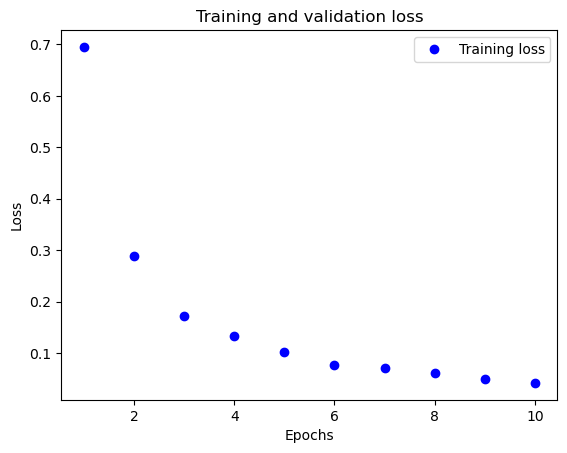

In [148]:
history_dict = history.history
loss = history_dict['loss']
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss'] 
#val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss') 
#plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss') 
plt.xlabel('Epochs')
plt.ylabel('Loss') 
plt.legend()
plt.show()

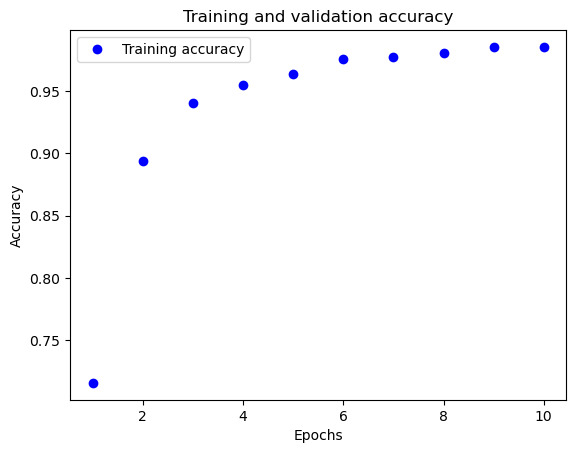

In [149]:
history_dict = history.history
loss = history_dict['loss']
import matplotlib.pyplot as plt
history_dict = history.history
accuracy_values = history_dict['accuracy'] 
#val_accuracy_values = history_dict['val_accuracy']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, accuracy_values, 'bo', label='Training accuracy') 
#plt.plot(epochs, val_accuracy_values, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy') 
plt.xlabel('Epochs')
plt.ylabel('Accuracy') 
plt.legend()
plt.show()

In [150]:
base_loss,base_accuracy=model.evaluate(X_test,y_test,batch_size = batch_size,verbose=1)

#cnn_file='CNN_Model.h5'
#tf.keras.models.save_model(model, cnn_file, include_optimizer=False)
#print('model saved at ', cnn_file)
#score,keras_file=evaluate_model(trainX,trainy,testX,testy)
score=base_accuracy*100
print('Accuracy >{:f}'.format(score))
print('Base Loss >{:.2f}'.format(base_loss))

92/92 [==============================] - 1s 4ms/step - loss: 0.1081 - accuracy: 0.9612
Accuracy >96.115845
Base Loss >0.11


92/92 [==============================] - 1s 4ms/step
f1 score :  0.960337344503003


<Axes: >

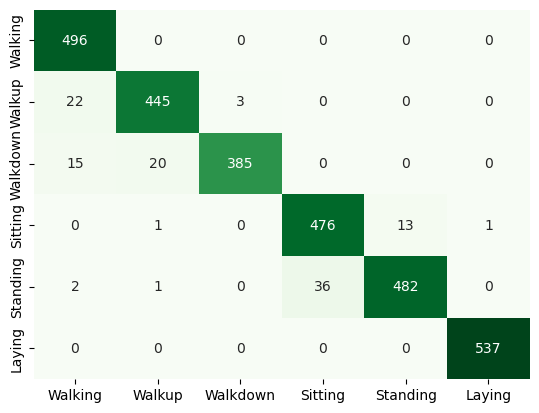

In [151]:
from sklearn.metrics import confusion_matrix
import pandas as pd
activity = ['Walking','Walkup','Walkdown','Sitting','Standing','Laying']

pred_cnn = model.predict(X_test)
len(pred_cnn)
y_true = np.argmax(y_test, axis = 1)
y_pred = np.argmax(pred_cnn, axis=1)

f1 = f1_score(y_true, y_pred, average='macro')

print('f1 score : ', f1)
#y_pred = [0] * len(pred_cnn)
#for i in range(len(pred_cnn)):
#    y_pred[i] = np.argmax(pred_cnn[i])
cm_cnn = confusion_matrix(y_true, y_pred)
cm_df_cnn = pd.DataFrame(cm_cnn, index= activity, columns=activity)

sns.heatmap(cm_df_cnn,cbar=False,annot=True,cmap="Greens",fmt="d")    

In [152]:
#Accuracy of the predicted values
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)


from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))



92/92 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       496
           1       0.95      0.95      0.95       470
           2       0.99      0.92      0.95       420
           3       0.93      0.97      0.95       491
           4       0.97      0.93      0.95       521
           5       1.00      1.00      1.00       537

    accuracy                           0.96      2935
   macro avg       0.96      0.96      0.96      2935
weighted avg       0.96      0.96      0.96      2935

[[496   0   0   0   0   0]
 [ 22 445   3   0   0   0]
 [ 15  20 385   0   0   0]
 [  0   1   0 476  13   1]
 [  2   1   0  36 482   0]
 [  0   0   0   0   0 537]]


# LSTM

In [85]:
from keras.models import Model
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from tensorflow.keras import optimizers

In [153]:
input_shape=(n_timesteps,n_features)
model = Sequential()
model.add(LSTM(64, input_shape= input_shape))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))
adam = optimizers.Adam(learning_rate = 0.001)
model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])
model.summary()
    
 # fit network


Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 64)                160256    
                                                                 
 dropout_10 (Dropout)        (None, 64)                0         
                                                                 
 dense_20 (Dense)            (None, 64)                4160      
                                                                 
 dense_21 (Dense)            (None, 6)                 390       
                                                                 
Total params: 164,806
Trainable params: 164,806
Non-trainable params: 0
_________________________________________________________________


In [154]:
history = model.fit(X_train, y_train, epochs=10, batch_size=batch_size, verbose=verbose)

Epoch 1/10
230/230 [==============================] - 8s 16ms/step - loss: 0.6254 - accuracy: 0.7435
Epoch 2/10
230/230 [==============================] - 4s 17ms/step - loss: 0.2050 - accuracy: 0.9211
Epoch 3/10
230/230 [==============================] - 4s 18ms/step - loss: 0.1368 - accuracy: 0.9520
Epoch 4/10
230/230 [==============================] - 4s 18ms/step - loss: 0.0965 - accuracy: 0.9663
Epoch 5/10
230/230 [==============================] - 4s 18ms/step - loss: 0.0774 - accuracy: 0.9723
Epoch 6/10
230/230 [==============================] - 4s 18ms/step - loss: 0.0676 - accuracy: 0.9772
Epoch 7/10
230/230 [==============================] - 4s 18ms/step - loss: 0.0634 - accuracy: 0.9770
Epoch 8/10
230/230 [==============================] - 4s 18ms/step - loss: 0.0350 - accuracy: 0.9895
Epoch 9/10
230/230 [==============================] - 4s 18ms/step - loss: 0.0318 - accuracy: 0.9913
Epoch 10/10
230/230 [==============================] - 4s 18ms/step - loss: 0.0264 - accura

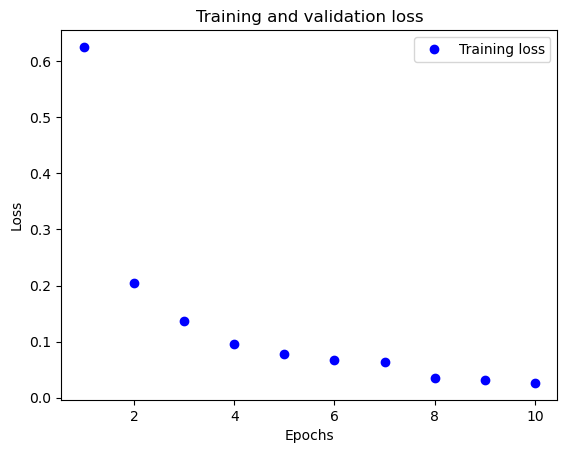

In [155]:
history_dict = history.history
loss = history_dict['loss']
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss'] 
#val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss') 
#plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss') 
plt.xlabel('Epochs')
plt.ylabel('Loss') 
plt.legend()
plt.show()

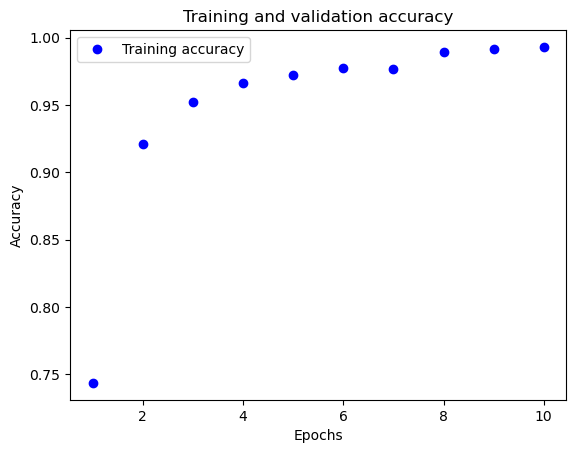

In [156]:
history_dict = history.history
loss = history_dict['loss']
import matplotlib.pyplot as plt
history_dict = history.history
accuracy_values = history_dict['accuracy'] 
#val_accuracy_values = history_dict['val_accuracy']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, accuracy_values, 'bo', label='Training accuracy') 
#plt.plot(epochs, val_accuracy_values, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy') 
plt.xlabel('Epochs')
plt.ylabel('Accuracy') 
plt.legend()
plt.show()

In [157]:
base_loss,base_accuracy=model.evaluate(X_test,y_test,batch_size = batch_size,verbose=1)

#cnn_file='CNN_Model.h5'
#tf.keras.models.save_model(model, cnn_file, include_optimizer=False)
#print('model saved at ', cnn_file)
#score,keras_file=evaluate_model(trainX,trainy,testX,testy)
score=base_accuracy*100
print('Accuracy >{:f}'.format(score))
print('Base Loss >{:.2f}'.format(base_loss))

92/92 [==============================] - 2s 10ms/step - loss: 0.2131 - accuracy: 0.9574
Accuracy >95.741057
Base Loss >0.21


92/92 [==============================] - 2s 10ms/step
f1 score :  0.9556482115407107


<Axes: >

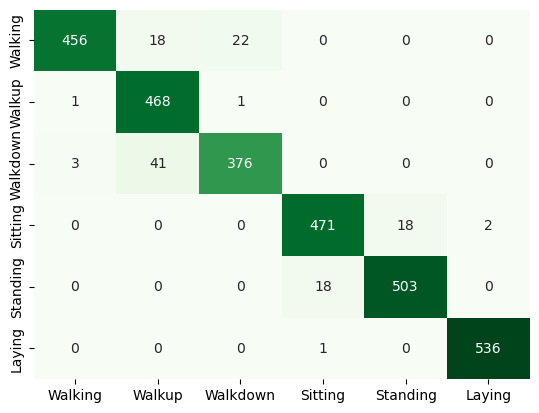

In [158]:
from sklearn.metrics import confusion_matrix
import pandas as pd
activity = ['Walking','Walkup','Walkdown','Sitting','Standing','Laying']

pred_cnn = model.predict(X_test)
len(pred_cnn)
y_true = np.argmax(y_test, axis = 1)
y_pred = np.argmax(pred_cnn, axis=1)

f1 = f1_score(y_true, y_pred, average='macro')

print('f1 score : ', f1)
#y_pred = [0] * len(pred_cnn)
#for i in range(len(pred_cnn)):
#    y_pred[i] = np.argmax(pred_cnn[i])
cm_cnn = confusion_matrix(y_true, y_pred)
cm_df_cnn = pd.DataFrame(cm_cnn, index= activity, columns=activity)

sns.heatmap(cm_df_cnn,cbar=False,annot=True,cmap="Greens",fmt="d")    

In [159]:
#Accuracy of the predicted values
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)


from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))



92/92 [==============================] - 1s 10ms/step
              precision    recall  f1-score   support

           0       0.99      0.92      0.95       496
           1       0.89      1.00      0.94       470
           2       0.94      0.90      0.92       420
           3       0.96      0.96      0.96       491
           4       0.97      0.97      0.97       521
           5       1.00      1.00      1.00       537

    accuracy                           0.96      2935
   macro avg       0.96      0.96      0.96      2935
weighted avg       0.96      0.96      0.96      2935

[[456  18  22   0   0   0]
 [  1 468   1   0   0   0]
 [  3  41 376   0   0   0]
 [  0   0   0 471  18   2]
 [  0   0   0  18 503   0]
 [  0   0   0   1   0 536]]
